In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For local
df1 = pd.read_csv('../data/interim/train_MICE_median_ind_QuantileTransformer.csv')
df2 = pd.read_csv('../data/interim/train_MICE_med_ind_QT_dropOutlier.csv')

# df_test = pd.read_csv('../data/processed/test_weight_regg.csv', index_col='EventId')  # Test data

In [92]:
df1.head(9)

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,ind_15,ind_40,ind_70,Weight,Label
0,0.105712,0.846853,-0.281832,-1.440634,-1.392330,1.819752,0.893908,1.227406,0.437620,1.236652,...,0.395113,0.850104,1.298783,-1.864348,0.705481,False,False,False,0.002653,1
1,0.523305,0.993621,0.206519,0.437861,0.180620,-0.579631,1.675206,-0.892661,-0.680013,5.199338,...,0.865277,0.557937,0.447191,0.752929,0.096192,False,False,True,2.233584,0
2,2.486980,1.404950,-0.065154,-0.671441,-0.682643,0.564616,1.137677,-0.069578,2.069243,5.199338,...,-1.246608,0.567757,-1.198176,1.155143,0.067556,True,False,True,2.347389,0
3,0.933682,0.289815,-2.269115,0.445044,0.435037,-0.327320,1.457621,-2.031581,1.245323,-0.374936,...,0.692627,0.317645,-0.443773,0.919892,-5.199338,False,True,True,5.446378,0
4,-0.758808,1.501841,-0.637574,1.043956,0.860625,-0.915816,2.094339,0.079973,-0.373591,-0.791884,...,0.207315,-0.592731,-0.253991,0.287972,-5.199338,False,True,True,6.245333,0
5,-0.893701,-0.687423,1.093261,-0.789254,-0.895246,0.946401,-1.141039,1.753710,-1.324958,0.228635,...,-0.537322,1.233450,0.377630,2.959638,1.261744,False,False,False,0.083414,0
6,-0.399469,1.104267,0.989902,-1.547310,-1.243363,1.198775,0.625670,-0.748265,1.896122,1.202347,...,0.991063,1.251839,0.240924,-2.110197,1.174802,False,False,False,0.002653,1
7,-1.050635,0.753561,-0.243181,0.040330,-0.285650,-0.086324,0.549616,-1.118972,-2.092023,-0.411534,...,-1.102143,0.172323,0.801577,1.048573,-0.223017,False,False,True,0.018636,1
8,0.083098,0.934714,-0.967601,0.467802,0.303152,-0.326681,0.561327,-0.408805,-1.109378,-0.641002,...,-0.010620,-0.277929,0.528853,0.017075,-5.199338,False,True,True,5.296003,0


Note: Here the categorical Label column is already converted to 0, 1

<AxesSubplot:xlabel='Weight', ylabel='Count'>

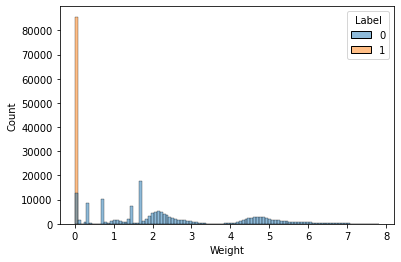

In [28]:
sns.histplot(x='Weight', hue='Label', data=df1)

<AxesSubplot:xlabel='Weight', ylabel='Probability'>

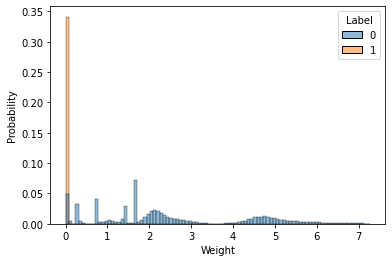

In [27]:
sns.histplot(x='Weight', hue='Label', data=df2, stat='probability')

<AxesSubplot:>

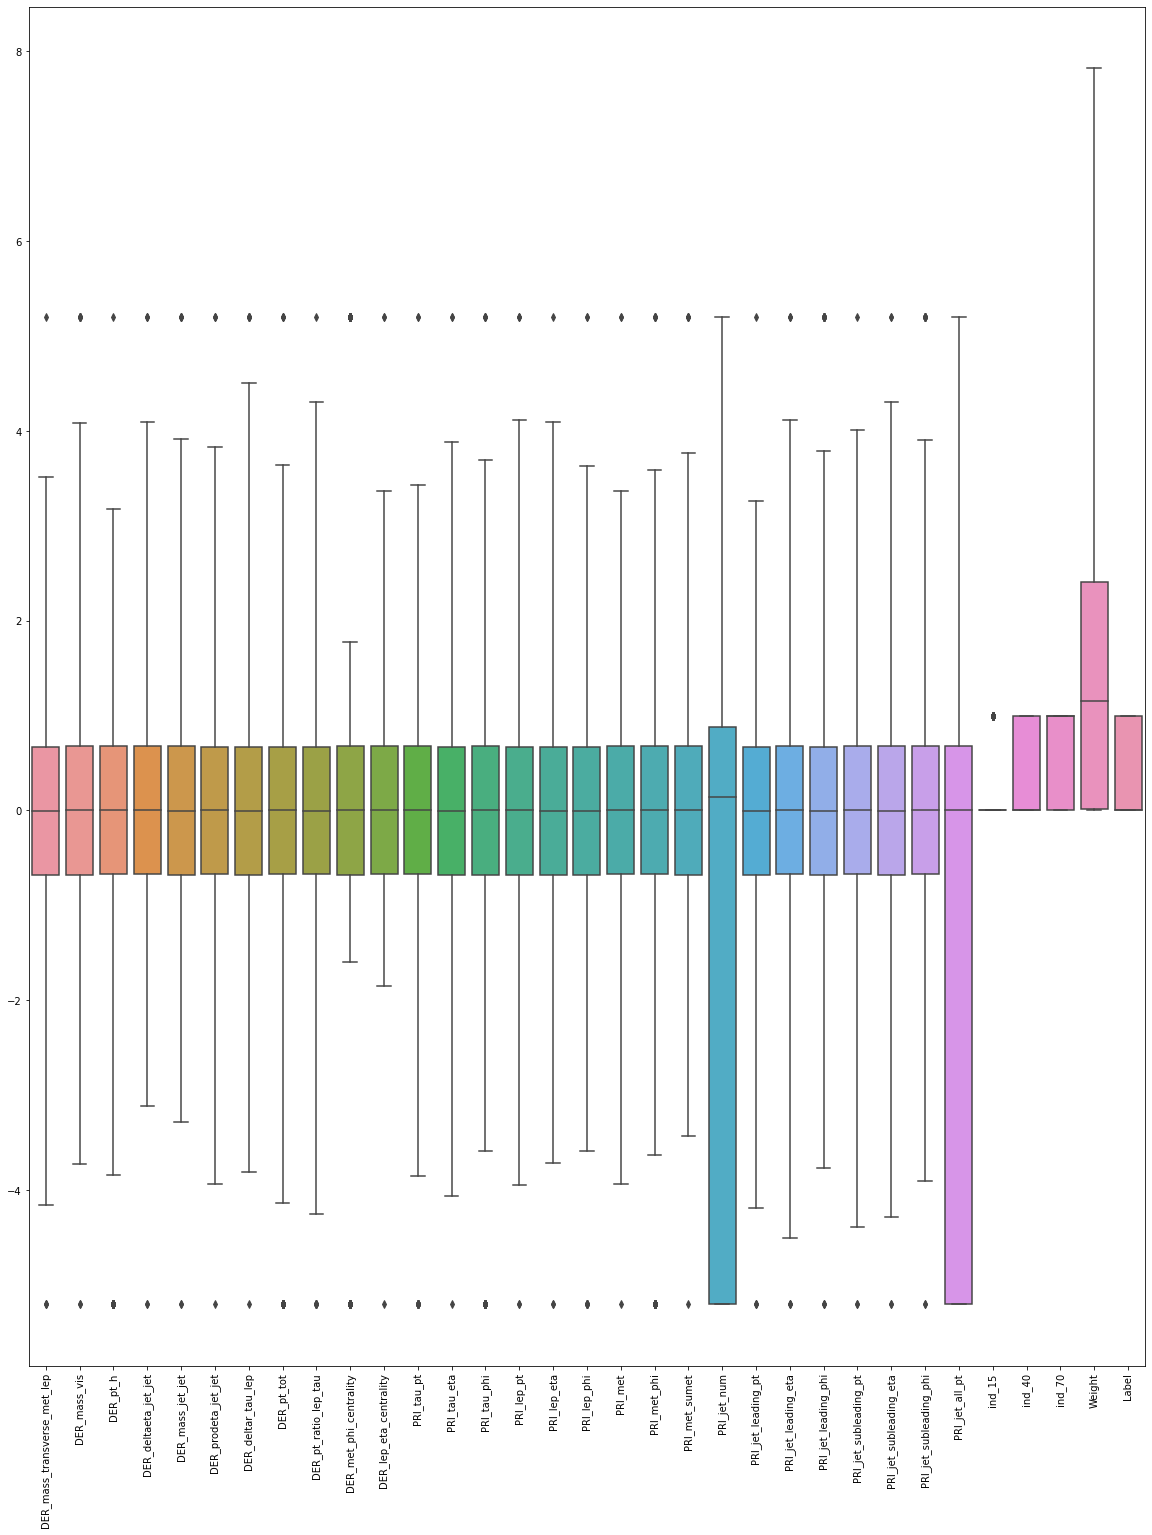

In [22]:
plt.figure(figsize=(20, 25))
plt.xticks(rotation='vertical')

sns.boxplot(data=df1, whis=3)

<AxesSubplot:>

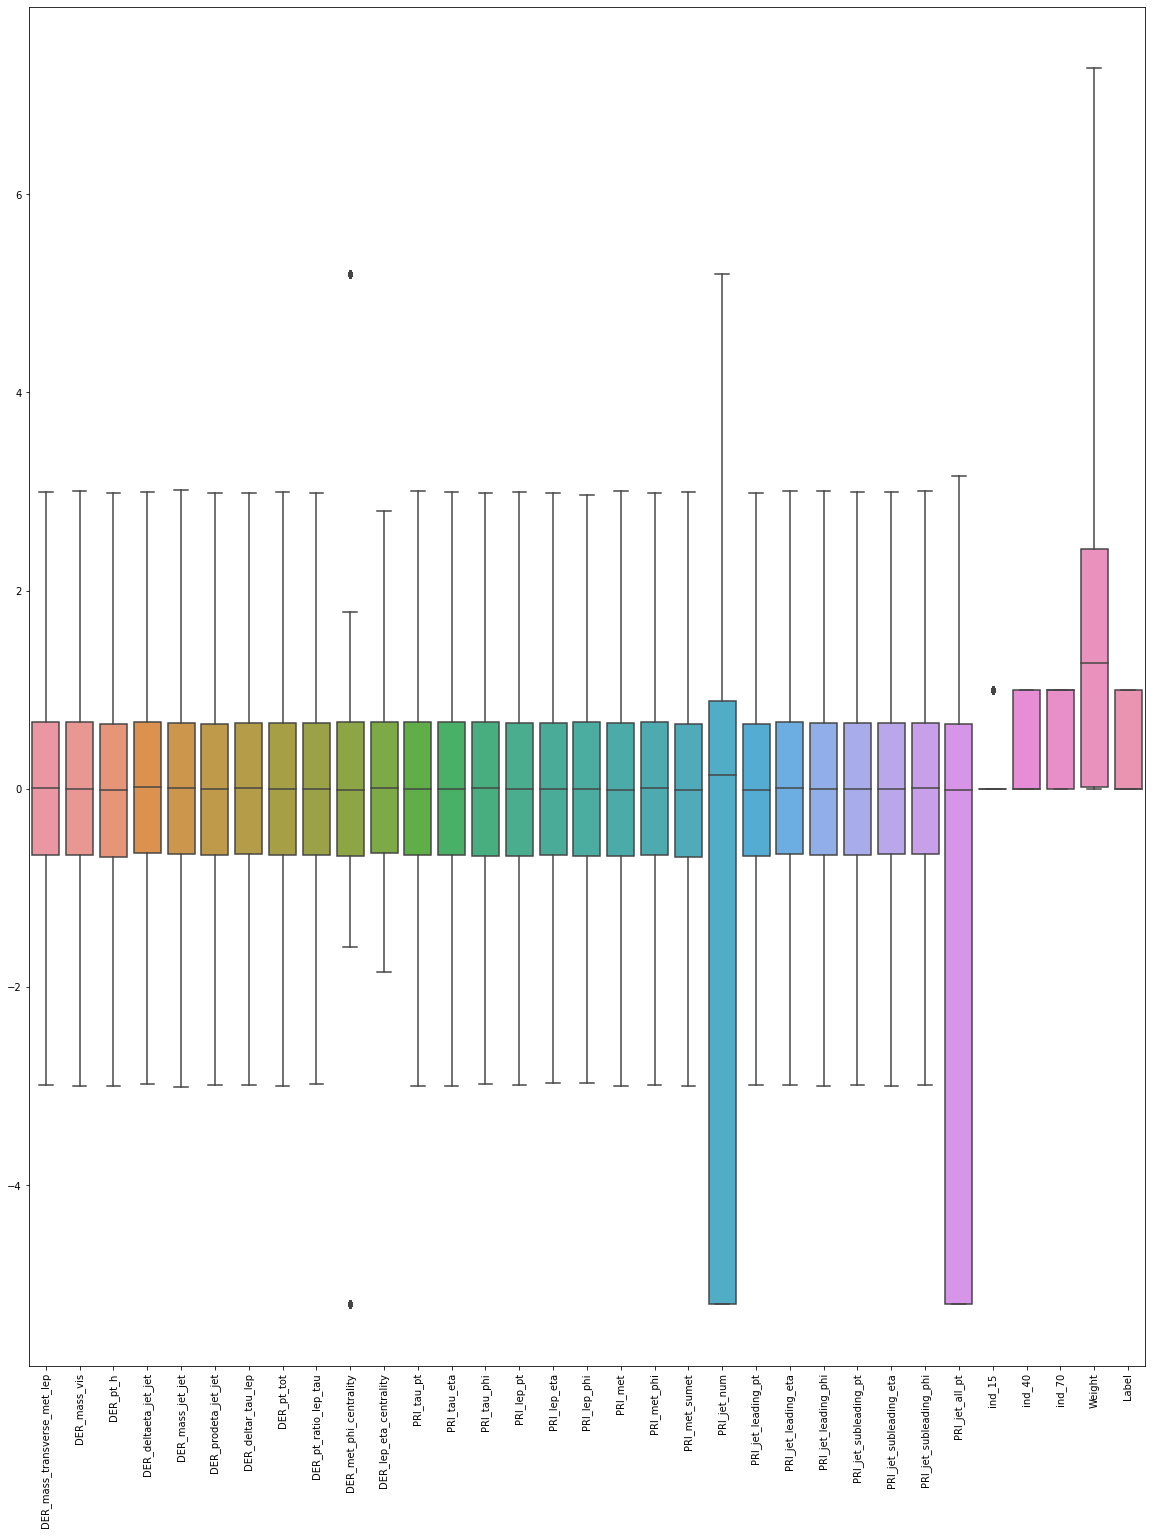

In [21]:
plt.figure(figsize=(20, 25))
plt.xticks(rotation='vertical')


sns.boxplot(data=df2, whis=3)   # The whiskers are at Q1-3*IQR and Q3+3*IQR

In [38]:
from sklearn.model_selection import train_test_split

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1.drop(columns="Label"), df1['Label'], test_size=25000)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.drop(columns="Label"), df2['Label'], test_size=25000)

## Creating Models:

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, fbeta_score, f1_score

In [80]:
decTree = DecisionTreeClassifier(max_depth=11, min_samples_split=60, min_samples_leaf=30)
decTree.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=30, min_samples_split=60)

In [81]:
pred = decTree.predict(X_train1)
confusion_matrix(y_train1, pred)

array([[147989,      0],
       [     0,  77011]], dtype=int64)

In [82]:
f1_score(y_train1, pred)

1.0

In [83]:
pred_test = decTree.predict(X_test1)
confusion_matrix(y_test1, pred_test)

array([[16344,     0],
       [    0,  8656]], dtype=int64)

In [99]:
df_test = pd.read_csv('../data/processed/test_weight_regg.csv', index_col='EventId')  # Test data

In [100]:
test_labels = decTree.predict(df_test)

In [101]:
df_test['Class'] = test_labels

In [102]:
print(df1.index)

RangeIndex(start=0, stop=250000, step=1)


In [104]:
df_test['Class'] = df_test['Class'].map({0: "b", 1: "s"})

In [106]:
df_test[['Class']].head()

,Class
EventId,
350000,b
350001,b
350002,b
350003,b
350004,b


In [107]:
df_test[['Class']].to_csv('../data/processed/final_submission.csv')